### VGG Net 응용
- VGG16, 19 : hidden layers 16, 19 ea
- 1000개의 데이터로 미리 학습된 모델임

In [1]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions

In [2]:
vgg16 = VGG16()
vgg16.summary()

553467096/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

from google.colab import files
up = files.upload()

Saving cat1.jpg to cat1.jpg


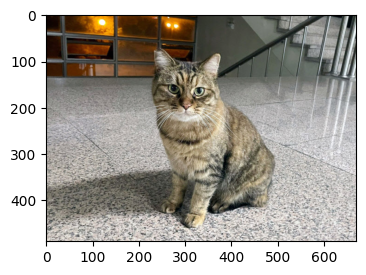

In [7]:
plt.figure(figsize=(4,4))
img = Image.open('cat1.jpg')
plt.imshow(img);

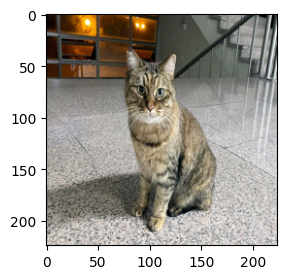

In [8]:
plt.figure(figsize=(4,3))
img = img.resize((224,224))
plt.imshow(img);

- 이미지 예측

In [9]:
yhat = vgg16.predict(np.array(img).reshape(-1,224,224,3))
label = decode_predictions(yhat)
yhat.shape, label

35363/35363 [==============================] - 0s 0us/step


((1, 1000),
 [[('n02124075', 'Egyptian_cat', 0.7885322),
   ('n02123045', 'tabby', 0.16991241),
   ('n02123159', 'tiger_cat', 0.037323523),
   ('n02127052', 'lynx', 0.0026395747),
   ('n02747177', 'ashcan', 0.00020967968)]])

In [10]:
yhat[0, :5]         # 1번째가 될확률 ... 5번째가 될 확률

array([2.6550187e-10, 5.8894201e-09, 1.7980877e-09, 4.5472421e-09,
       4.8027258e-09], dtype=float32)